In [2]:
# Imports

import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

from tensorflow.keras.layers import Layer
import tensorflow as tf

# Helper Functions

In [3]:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer

class LinearRegressionModel(Layer):
  
  def __init__(self):
    super(LinearRegressionModel, self).__init__()

  def build(self, x):
    
    w_init = tf.random_normal_initializer()
    self.W = tf.Variable(
      initial_value=w_init(shape=(x[-1],1), dtype='float32'),
      trainable=True,
      name='weights'
    )
    
    b_init = tf.random_normal_initializer()
    self.b = tf.Variable(
      initial_value=b_init(shape=(1,), dtype='float32'),
      trainable=True,
      name='bias'
    )

  def call(self, x):
      return tf.matmul(x, self.W) + self.b

In [4]:
# test = LinearRegressionModel()
# test_x = np.ones((1,1))
# test_y = test(test_x) 
# test.variables

In [6]:
# Configuration Variables

number_of_observations = 12800
number_of_features = 1

EPOCHS = 100
bgd_batch = number_of_observations
sgd_batch = 1
mbgd_batch = 32

model_performance = {}

## Synthesizing the data

In [7]:
np.random.seed(0)

# Creating a observations
X_train = np.random.rand(number_of_observations,number_of_features)
X_valid = np.random.rand(number_of_observations,number_of_features)

# Instantiating the parameters W and b
W = np.round(np.random.rand(number_of_features,1)*10, 0)
b = np.round(np.random.rand(1,1),0)

# Creating some noise
noise = np.random.randn(number_of_observations,1)

# Creating y by doing XW + b and some noise
y_train = np.dot(X_train, W) + b + noise
y_valid = np.dot(X_valid, W) + b + noise

print(f"True W: {W[0][0]} \nTrue b: {b[0][0]}")

True W: 5.0 
True b: 1.0


## Visualize the Data

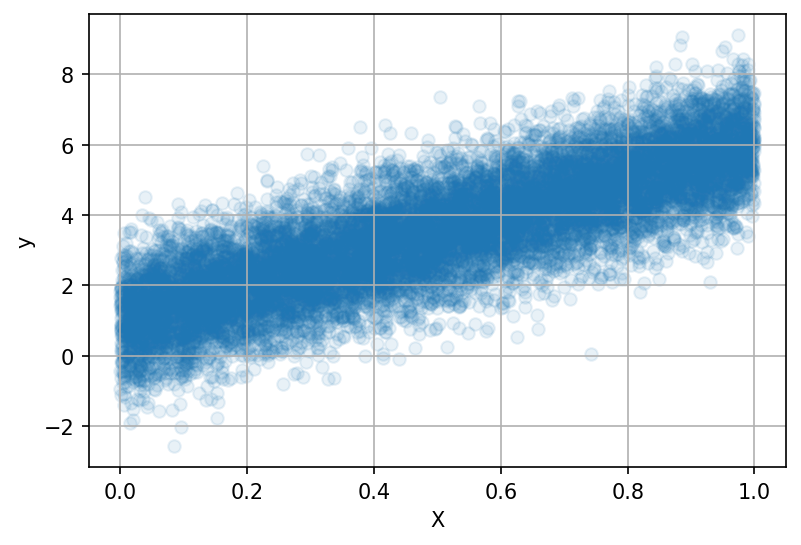

In [8]:
# Plotting the data

plt.scatter(X_train, y_train, alpha=0.1)
plt.xlabel('X')
plt.ylabel('y')
plt.grid()

# Training the Model

## Tensorflow Sequential Model

In [9]:
def prepare_dataset(data, labels, batch, shuffle_buffer=100):
  dataset = tf.data.Dataset.from_tensor_slices((data, labels))
  dataset = dataset.shuffle(shuffle_buffer)
  dataset = dataset.batch(batch).prefetch(1)
  return dataset

In [10]:
# Callbacks

es_cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

reduce_lr_cb = tf.keras.callbacks.ReduceLROnPlateau(
  monitor='loss', 
  factor=0.2,
  patience=3, 
  min_lr=0.001
)

In [11]:
# Function that builds a general model

def build_model():

  tf.keras.backend.clear_session()

  model = tf.keras.Sequential([
    LinearRegressionModel()
  ])

  model.compile(
      loss=tf.keras.losses.mse,
      optimizer=tf.keras.optimizers.SGD(),
      metrics=['mse']
  )

  history = model.fit(
      train_dataset,
      epochs=EPOCHS,
      verbose=1,
      validation_data=valid_dataset,
      callbacks=[es_cb, reduce_lr_cb]
  )

  return model, history

## Batch Gradient Descent

In [12]:
batch_size = number_of_observations
train_dataset = prepare_dataset(X_train, y_train, batch_size)
valid_dataset = prepare_dataset(X_valid, y_valid, batch_size)

In [13]:
start_time = time.time()
bgd_model, bgd_history = build_model()
bgd_elapsed_time = time.time() - start_time

Epoch 1/100
1/1 [==============================] - 1s 818ms/step - loss: 15.1506 - mse: 15.1506 - val_loss: 14.5416 - val_mse: 14.5416 - lr: 0.0100
Epoch 2/100
1/1 [==============================] - 0s 72ms/step - loss: 14.4952 - mse: 14.4952 - val_loss: 13.9156 - val_mse: 13.9156 - lr: 0.0100
Epoch 3/100
1/1 [==============================] - 0s 82ms/step - loss: 13.8724 - mse: 13.8724 - val_loss: 13.3206 - val_mse: 13.3206 - lr: 0.0100
Epoch 4/100
1/1 [==============================] - 0s 74ms/step - loss: 13.2805 - mse: 13.2805 - val_loss: 12.7552 - val_mse: 12.7552 - lr: 0.0100
Epoch 5/100
1/1 [==============================] - 0s 70ms/step - loss: 12.7179 - mse: 12.7179 - val_loss: 12.2177 - val_mse: 12.2177 - lr: 0.0100
Epoch 6/100
1/1 [==============================] - 0s 76ms/step - loss: 12.1833 - mse: 12.1833 - val_loss: 11.7069 - val_mse: 11.7069 - lr: 0.0100
Epoch 7/100
1/1 [==============================] - 0s 81ms/step - loss: 11.6753 - mse: 11.6753 - val_loss: 11.2215 - 

## Stochastic Gradient Descent

In [14]:
batch_size = 1
train_dataset = prepare_dataset(X_train, y_train, batch_size)
valid_dataset = prepare_dataset(X_valid, y_valid, batch_size)

In [15]:
start_time = time.time()
sgd_model, sgd_history = build_model()
sgd_elapsed_time = time.time() - start_time

Epoch 1/100
12800/12800 [==============================] - 38s 3ms/step - loss: 1.0640 - mse: 1.0640 - val_loss: 1.0130 - val_mse: 1.0130 - lr: 0.0100
Epoch 2/100
12800/12800 [==============================] - 38s 3ms/step - loss: 1.0166 - mse: 1.0166 - val_loss: 1.0542 - val_mse: 1.0542 - lr: 0.0100
Epoch 3/100
12800/12800 [==============================] - 38s 3ms/step - loss: 1.0171 - mse: 1.0171 - val_loss: 1.0140 - val_mse: 1.0140 - lr: 0.0100
Epoch 4/100
12800/12800 [==============================] - 37s 3ms/step - loss: 1.0158 - mse: 1.0158 - val_loss: 1.0152 - val_mse: 1.0152 - lr: 0.0100
Epoch 5/100
12800/12800 [==============================] - 37s 3ms/step - loss: 1.0173 - mse: 1.0173 - val_loss: 1.0138 - val_mse: 1.0138 - lr: 0.0100
Epoch 6/100
12800/12800 [==============================] - 29s 2ms/step - loss: 1.0165 - mse: 1.0165 - val_loss: 1.0319 - val_mse: 1.0319 - lr: 0.0100
Epoch 7/100
12800/12800 [==============================] - 37s 3ms/step - loss: 1.0163 - mse: 

## Mini-Batch Gradient Descent

In [16]:
batch_size = 64
train_dataset = prepare_dataset(X_train, y_train, batch_size)
valid_dataset = prepare_dataset(X_valid, y_valid, batch_size)

In [17]:
start_time = time.time()
mbgd_model, mbgd_history = build_model()
mbgd_elapsed_time = time.time() - start_time

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 3.1206 - mse: 3.1206 - val_loss: 1.5845 - val_mse: 1.5845 - lr: 0.0100
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 1.4832 - mse: 1.4832 - val_loss: 1.3358 - val_mse: 1.3358 - lr: 0.0100
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 1.2850 - mse: 1.2850 - val_loss: 1.1921 - val_mse: 1.1921 - lr: 0.0100
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 1.1685 - mse: 1.1685 - val_loss: 1.1092 - val_mse: 1.1092 - lr: 0.0100
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 1.1000 - mse: 1.1000 - val_loss: 1.0616 - val_mse: 1.0616 - lr: 0.0100
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 1.0599 - mse: 1.0599 - val_loss: 1.0345 - val_mse: 1.0345 - lr: 0.0100
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 1.0363 - mse: 1.0363 - val_loss: 1.0193 - val_mse

In [18]:
# Predicting 

bgd_preds = bgd_model.predict(X_valid)
sgd_preds = sgd_model.predict(X_valid)
mbgd_preds = mbgd_model.predict(X_valid)

400/400 [==============================] - 0s 1ms/step


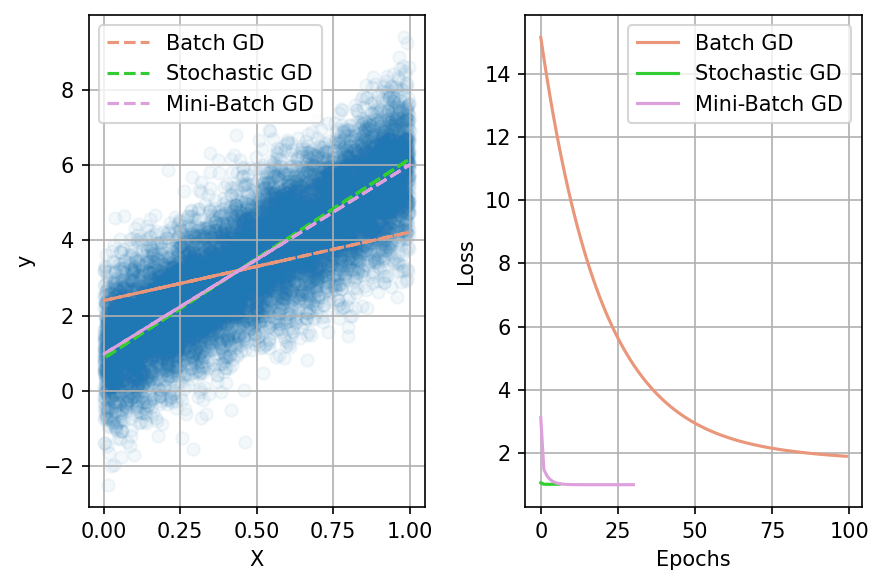

In [22]:
# Plotting the data

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(X_valid, y_valid, alpha=0.05)
ax1.plot(X_valid, bgd_preds, color='darksalmon', label='Batch GD', linestyle='--')
ax1.plot(X_valid, sgd_preds, color='limegreen', label='Stochastic GD', linestyle='--')
ax1.plot(X_valid, mbgd_preds, color='plum', label='Mini-Batch GD', linestyle='--')
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid()

ax2.plot(bgd_history.history['loss'], color='darksalmon', label='Batch GD')
ax2.plot(sgd_history.history['loss'], color='limegreen', label='Stochastic GD')
ax2.plot(mbgd_history.history['loss'], color='plum', label='Mini-Batch GD')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid()

plt.tight_layout()

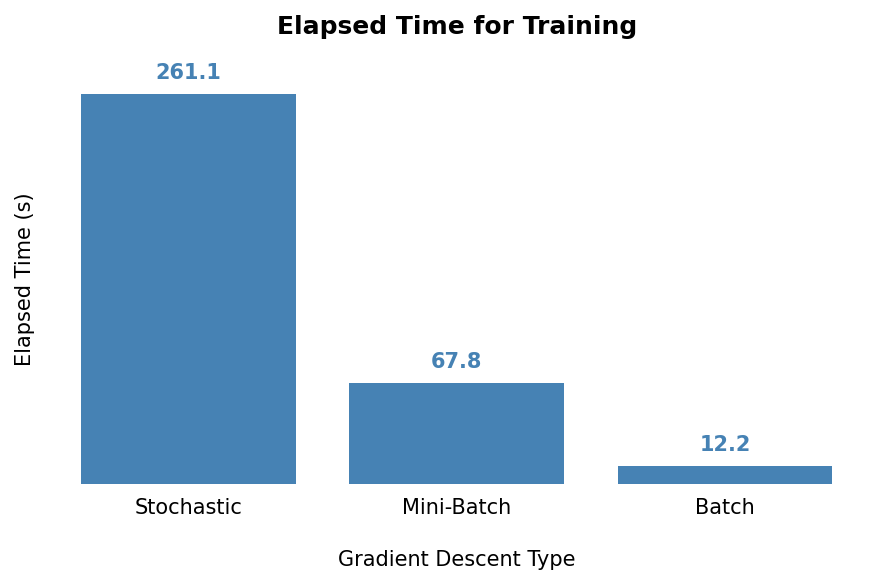

In [20]:
# Plotting Elapsed Time

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+10, np.round(y[i],1), ha = 'center', color='steelblue', weight='bold')

plt.bar(x=['Stochastic', 'Mini-Batch', 'Batch'], height=[sgd_elapsed_time, mbgd_elapsed_time, bgd_elapsed_time], color='steelblue')
plt.title("Elapsed Time for Training\n", fontweight='bold')
plt.xlabel("\nGradient Descent Type")
plt.ylabel("Elapsed Time (s)")
add_labels(['Stochastic', 'Mini-Batch', 'Batch'], [sgd_elapsed_time, mbgd_elapsed_time, bgd_elapsed_time])

# Removing the borders
for spine in plt.gca().spines.values():
  spine.set_visible(False)

#. Removing unnecessary ticks
plt.tick_params(left=False)
plt.tick_params(bottom=False)
plt.yticks([])

plt.tight_layout()

# Custom Implementation (Work in Progress)

In [ ]:
def train_model(model, gd_type='BATCH', batch_size=None):
  
  tf.keras.backend.clear_session()
  
  losses = []
  training_mse = []
  weights = []
  biases = []
  # validation_mse = []
  
  start_time = time.time()

  for epoch in range(0, EPOCHS):
    batch_losses = []
    batch_mse = []
    batch_weights = []
    batch_biases = []
    for batch in create_batches(X_train, y_train, batch_size):
      current_loss = calculate_gradients_and_update_parameters(model, batch[0], batch[1], 0.1)
      batch_losses.append(current_loss)
      batch_mse.append(current_loss)
      batch_weights.append(bgd_model.W.numpy()[0][0])
      batch_biases.append(bgd_model.b.numpy()[0])
    losses.append(np.mean(batch_losses))
    training_mse.append(np.mean(batch_mse))
    weights.append(np.mean(batch_weights))
    biases.append(np.mean(batch_biases))
    print(f'EPOCH {epoch+1}:\n  LOSS: {losses[-1]} TRAINING MSE: {training_mse[-1]} WEIGHTS: {weights[-1]}')
  
  elapsed_time = time.time() - start_time

  # model_performance[gd_type] = {'model':model, 'loss':losses, 'training_mse':training_mse, 'valid_mse':validation_mse, 'elapsed_time':elapsed_time}
  model_performance[gd_type] = {'model':model, 'loss':losses, 'training_mse':training_mse, 'elapsed_time':elapsed_time, 'weights':weights, 'biases':biases}

  return (losses, training_mse)

In [ ]:
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [ ]:
def calculate_gradients_and_update_parameters(model, x, y, learning_rate):
  with tf.GradientTape() as t:
    y_preds = model(x)
    current_loss = mean_squared_error(y, y_preds)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)
  return current_loss

In [ ]:
def create_batches(X, y, batch_size):
  
  if batch_size == X.shape[0]:
    return [(X,y)]
  
  batches = []
  data = np.hstack((X, y))
  np.random.shuffle(data)
  mini_batches = data.shape[0] // batch_size

  for i in range(mini_batches+1):
    
    if i*batch_size == data.shape[0]:
      continue
    
    mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
    
    X_ = mini_batch[:, :-1]
    
    y_ = mini_batch[:, -1].reshape((-1, 1))
    
    batches.append((X_, y_))

  return batches

### Batch Gradient Descent

In [21]:
# model = tf.keras.Sequential([
#     LinearRegressionModel()
# ])

# model.compile(
#     optimizer=,
#     loss=mean_squared_error,
#     metrics=['mse']
# )

In [39]:
# bgd_model = LinearRegressionModel()
# bgd_history = train_model(bgd_model, 'BATCH', bgd_batch)

EPOCH 1:
  LOSS: 15.172865867614746 TRAINING MSE: 15.172865867614746 WEIGHTS: 0.4798361659049988
EPOCH 2:
  LOSS: 9.343059539794922 TRAINING MSE: 9.343059539794922 WEIGHTS: 0.8105612993240356
EPOCH 3:
  LOSS: 6.074646472930908 TRAINING MSE: 6.074646472930908 WEIGHTS: 1.0686166286468506
EPOCH 4:
  LOSS: 4.237648010253906 TRAINING MSE: 4.237648010253906 WEIGHTS: 1.2722090482711792
EPOCH 5:
  LOSS: 3.2007040977478027 TRAINING MSE: 3.2007040977478027 WEIGHTS: 1.4349496364593506
EPOCH 6:
  LOSS: 2.6110498905181885 TRAINING MSE: 2.6110498905181885 WEIGHTS: 1.5670143365859985
EPOCH 7:
  LOSS: 2.2715792655944824 TRAINING MSE: 2.2715792655944824 WEIGHTS: 1.676011323928833
EPOCH 8:
  LOSS: 2.0721569061279297 TRAINING MSE: 2.0721569061279297 WEIGHTS: 1.7676293849945068
EPOCH 9:
  LOSS: 1.951240062713623 TRAINING MSE: 1.951240062713623 WEIGHTS: 1.8461226224899292
EPOCH 10:
  LOSS: 1.8744360208511353 TRAINING MSE: 1.8744360208511353 WEIGHTS: 1.914672613143921


### Stochastic Gradient Descent

In [23]:
# sgd_model = LinearRegressionModel()
# sgd_history = train_model(sgd_model, 'SGD', batch_size=1)

### Mini-Batch Gradient Descent

In [40]:
# mbgd_model = LinearRegressionModel()
# mbgd_history = train_model(mbgd_model, 'MINIBATCH', mbgd_batch)

EPOCH 1:
  LOSS: 1.1896098852157593 TRAINING MSE: 1.1896098852157593 WEIGHTS: 1.9146727323532104
EPOCH 2:
  LOSS: 1.0071847438812256 TRAINING MSE: 1.0071847438812256 WEIGHTS: 1.9146727323532104
EPOCH 3:
  LOSS: 1.006118893623352 TRAINING MSE: 1.006118893623352 WEIGHTS: 1.9146727323532104
EPOCH 4:
  LOSS: 1.0087159872055054 TRAINING MSE: 1.0087159872055054 WEIGHTS: 1.9146727323532104
EPOCH 5:
  LOSS: 1.0080699920654297 TRAINING MSE: 1.0080699920654297 WEIGHTS: 1.9146727323532104
EPOCH 6:
  LOSS: 1.00773286819458 TRAINING MSE: 1.00773286819458 WEIGHTS: 1.9146727323532104
EPOCH 7:
  LOSS: 1.0083186626434326 TRAINING MSE: 1.0083186626434326 WEIGHTS: 1.9146727323532104
EPOCH 8:
  LOSS: 1.0072910785675049 TRAINING MSE: 1.0072910785675049 WEIGHTS: 1.9146727323532104
EPOCH 9:
  LOSS: 1.0071232318878174 TRAINING MSE: 1.0071232318878174 WEIGHTS: 1.9146727323532104
EPOCH 10:
  LOSS: 1.0075297355651855 TRAINING MSE: 1.0075297355651855 WEIGHTS: 1.9146727323532104


In [ ]:
# print(f"Predicted W: {model.W.numpy()[0][0]} \nPredicted b: {model.b.numpy()[0]}")
# training_preds = model(X_train)

In [ ]:
# # Plotting the data

# plt.scatter(X_train, y_train, label='Data')
# plt.plot(X_train, training_preds, color='r', label='Predicted Model', linestyle='--')
# plt.xlabel('X')
# plt.ylabel('y')
# plt.legend()
# plt.grid()

In [ ]:
# second_model = LinearRegressionModel()

# BATCH_SIZE = 32
# EPOCHS = 20

# losses = []
# training_accuracy = []
# validation_accuracy = []

# for epoch in range(0, EPOCHS):
#   batches = create_batches(X_train, y_train, BATCH_SIZE)
#   for batch in batches:
#     current_loss = calculate_gradients_and_update_parameters(second_model, batch[0], batch[1], 0.1)
#     losses.append(current_loss)
#     training_accuracy.append(current_loss)
#     current_valid_pred = second_model(X_valid)
#     current_valid_acc = mean_squared_error(current_valid_pred, y_valid)
#     validation_accuracy.append(current_valid_acc)
#   print(f'epoch {epoch+1}: LOSS: {current_loss} TRAINING ACCURACY: {training_accuracy[-1]} VALIDATION ACCURACY: {validation_accuracy[-1]}')

In [ ]:
# print(second_model.W, second_model.b)